# Radar Water Level Monitoring

Here you can find some examples of data processing and plotting.

[data](https://o365coloradoedu-my.sharepoint.com/:f:/g/personal/anza4273_colorado_edu/Emctie6mJf5PsXxOzXd_jawBO2UcDfpsXFRFlvxeAXSmxA?e=abpIHF)

In [1]:
import pickle
import bag_utils as utils
%matplotlib inline


tmp_file = 'tmp_data.pkl'

In [2]:
import csv
import datetime
import os

import numpy as np
import ipywidgets as widgets
import matplotlib.animation as anim
import matplotlib.pyplot as plt
from scipy import stats
from tqdm import tqdm

import rosbag
from sensor_msgs.msg import Imu
from sensor_msgs import point_cloud2 as pc2
import tf.transformations as tf

### 0. Read and process the data, takes a while, processed stats can be saved in a file

In [13]:
data = utils.process_bags(
    bags_folder='../data/deployment_nov2023', return_dates=True, show_plots=False, y_limit=999, y_threshold=0.1,)
#     y_limit=999, x_limit=999, y_threshold=0., int_threshold=0, int_threshold_percent=True, window_size=40)
with open(tmp_file, 'wb') as f:
    pickle.dump(data, f)

Processing 114 files


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 114/114 [03:46<00:00,  1.99s/it]


### 1. Load preprocessed data

In [3]:
with open(tmp_file, 'rb') as f:
    data = pickle.load(f) 
gt = utils.read_gt('../data/deployment_nov2023/GT_Nov2023.csv')

In [4]:
len(data[0])

114

## 2.1 Plot November Data

### Example Single Run 

In [5]:
bags_folder='../data/deployment_nov2023'
filename_formats = '%d.%m.%Y_%H.%M', '%H.%M.%S_%d.%m.%Y'
paths = tuple(
        os.path.join(bags_folder, filename) for filename in os.listdir(bags_folder)
        if filename.endswith('.bag')
    )
paths = sorted(paths, key=os.path.getmtime)
dates = []

print('Processing', len(paths), 'files')
for path in tqdm(paths[1:2]):  # reading one file of 114
    filename = os.path.basename(path).replace('.bag', '')
    dt = None
    for format in filename_formats:
        try:
            dt = datetime.datetime.strptime(filename, format)
        except ValueError:
            continue
    if not dt:    
        raise ValueError(f"Invalid bag filename format: {filename}. Acceptable formats are: {', '.join(filename_formats)}")
    dates.append(dt)

    imu, r1843, r1443 = utils.read_bag_messages(path)
    x1843, y1843, z1843, ang1843, int1843, rng1843, dop1843 = utils.process_1843(r1843, imu, apply_rotation=True)
    angle_avg = np.mean(ang1843)
    x1443, y1443, z1443, int1443, rng1443, dop1443 = utils.process_1443(r1443, angle=angle_avg)

Processing 114 files


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.85s/it]


In [9]:
# y_limit=6
# x_limit=6
# y_threshold=0.5
# int_threshold=60
# int_threshold_percent=True
# window_size=20

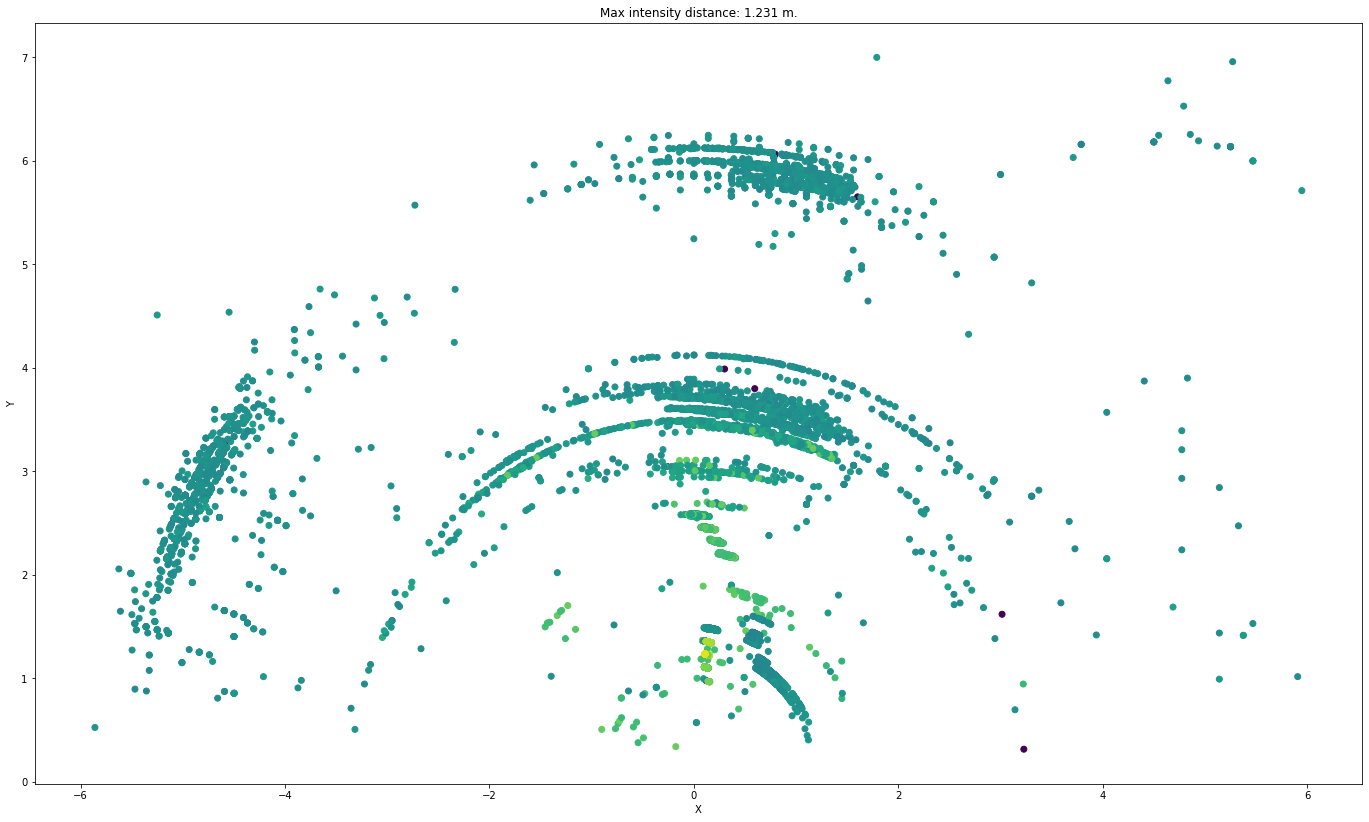

1.231

In [6]:
utils.plot_1843(
    x1843, y1843, z1843, ang1843, int1843, rng1843, dop1843, 
    y_limit=7, x_limit=6, y_threshold=0.3,
    int_threshold=50, int_threshold_percent=True
)

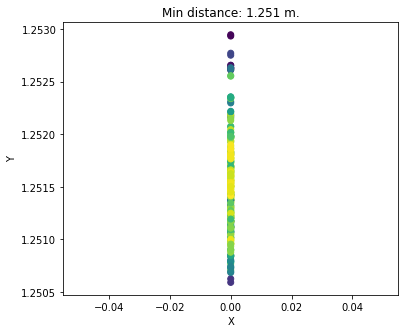

In [7]:
min_y = utils.plot_1443(
    y1443, int1443,
    y_limit=999, y_threshold=0., int_threshold=0,
    show_plots=True
)

In [8]:
min_y

1.251

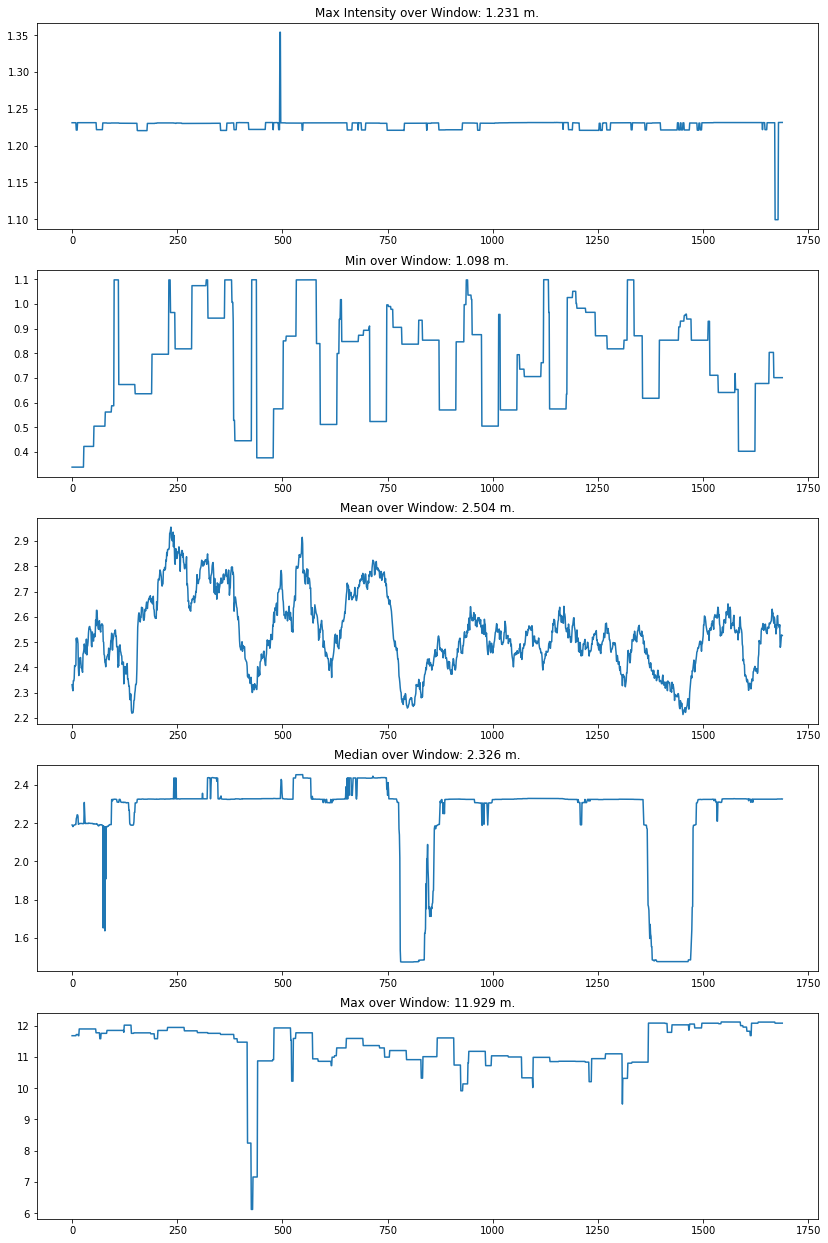

In [10]:
y_max_intens_mode, y_min_mode, y_mean_mode, y_median_mode, y_max_mode = utils.plot_stats(
    x1843, y1843, int1843, 
    y_limit=999, x_limit=999, y_threshold=0.3,
    int_threshold=50, int_threshold_percent=True, window_size=40,
    show_plots=True
)

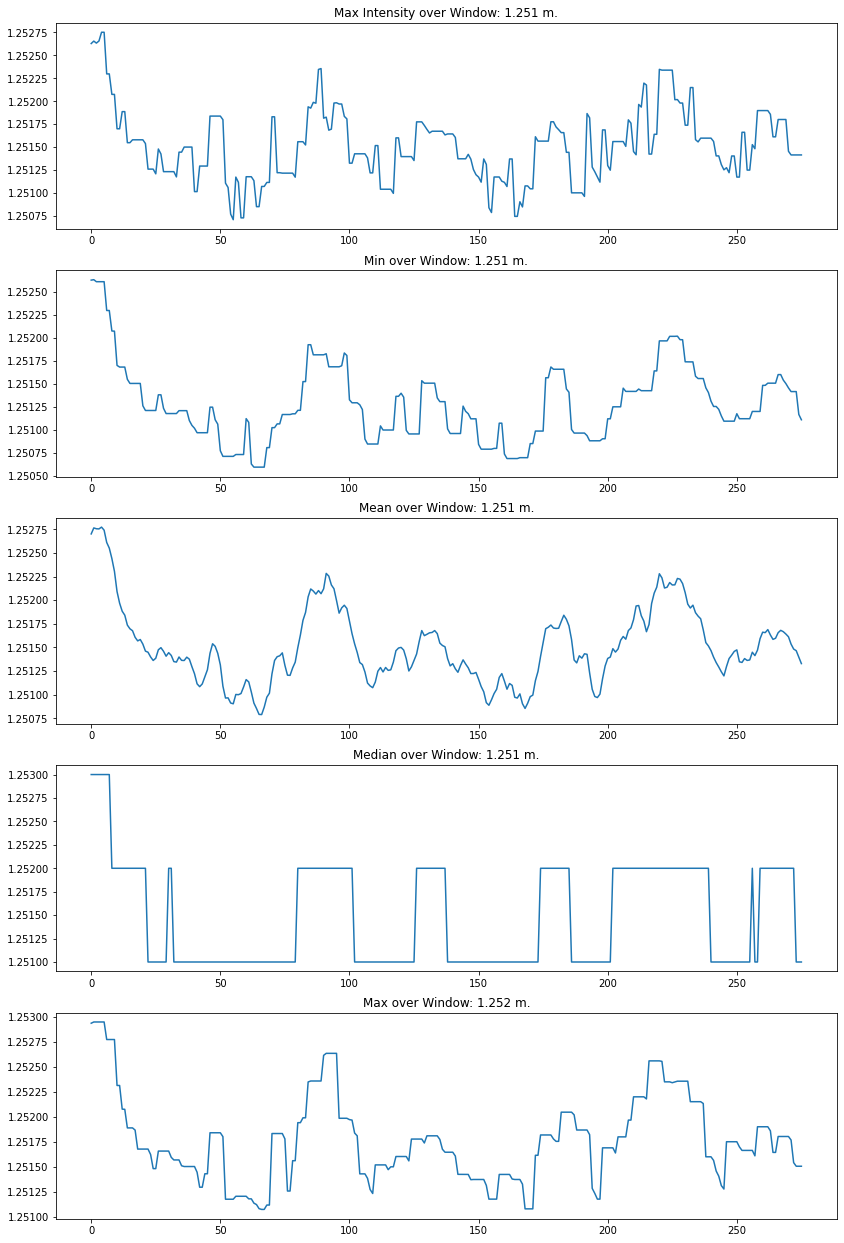

In [11]:
y_max_intens_mode, y_min_mode, y_mean_mode, y_median_mode, y_max_mode = utils.plot_stats_1443(
    x1443, y1443, int1443, 
    y_limit=999, x_limit=999, y_threshold=0.,
    int_threshold=0, int_threshold_percent=False,
    window_size=5, show_plots=True
)

### All runs

Min distance MSE: 9.035969311232188e-05
Max Intensity MSE: 1.267868899775513e-05
Windowed min distance MSE: 2.3568883184051895e-05


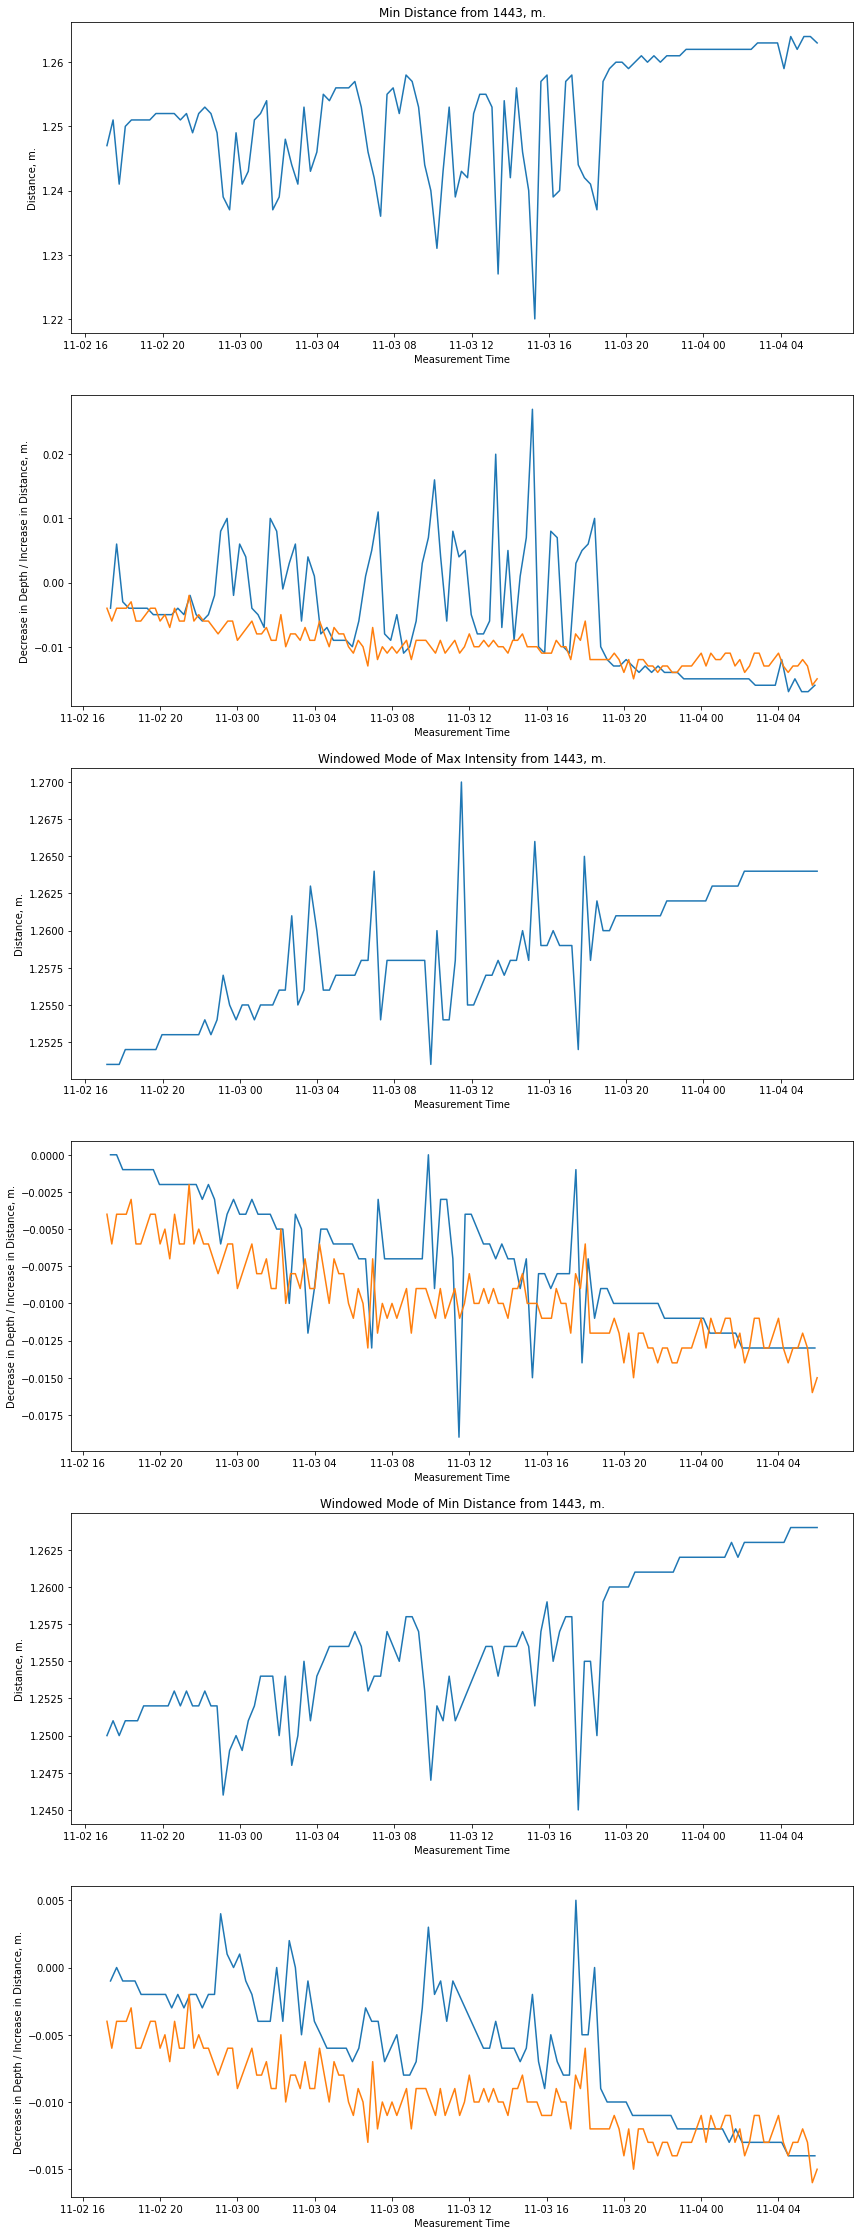

In [5]:
utils.plot_total(data, gt, label_dates=True)

## 2.2 Plot September Data

In [23]:
bags_folder='../data/deployment_sept2023'
filename_formats = '%d.%m.%Y_%H.%M', '%H.%M.%S_%d.%m.%Y'
paths = tuple(
        os.path.join(bags_folder, filename) for filename in os.listdir(bags_folder)
        if filename.endswith('.bag')
    )
paths = sorted(paths, key=os.path.getmtime)
dates = []

print('Processing', len(paths), 'files')
for path in tqdm(paths[10:11]):
    filename = os.path.basename(path).replace('.bag', '')
    dt = None
    for format in filename_formats:
        try:
            dt = datetime.datetime.strptime(filename, format)
        except ValueError:
            continue
    if not dt:    
        raise ValueError(f"Invalid bag filename format: {filename}. Acceptable formats are: {', '.join(filename_formats)}")
    dates.append(dt)

    imu, r1843, r1443 = utils.read_bag_messages(path)
    x1843, y1843, z1843, ang1843, int1843, rng1843, dop1843 = utils.process_1843(r1843, imu, apply_rotation=True)
    angle_avg = np.mean(ang1843)
    x1443, y1443, z1443, int1443, rng1443, dop1443 = utils.process_1443(r1443, angle=angle_avg)

Processing 119 files


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.76s/it]


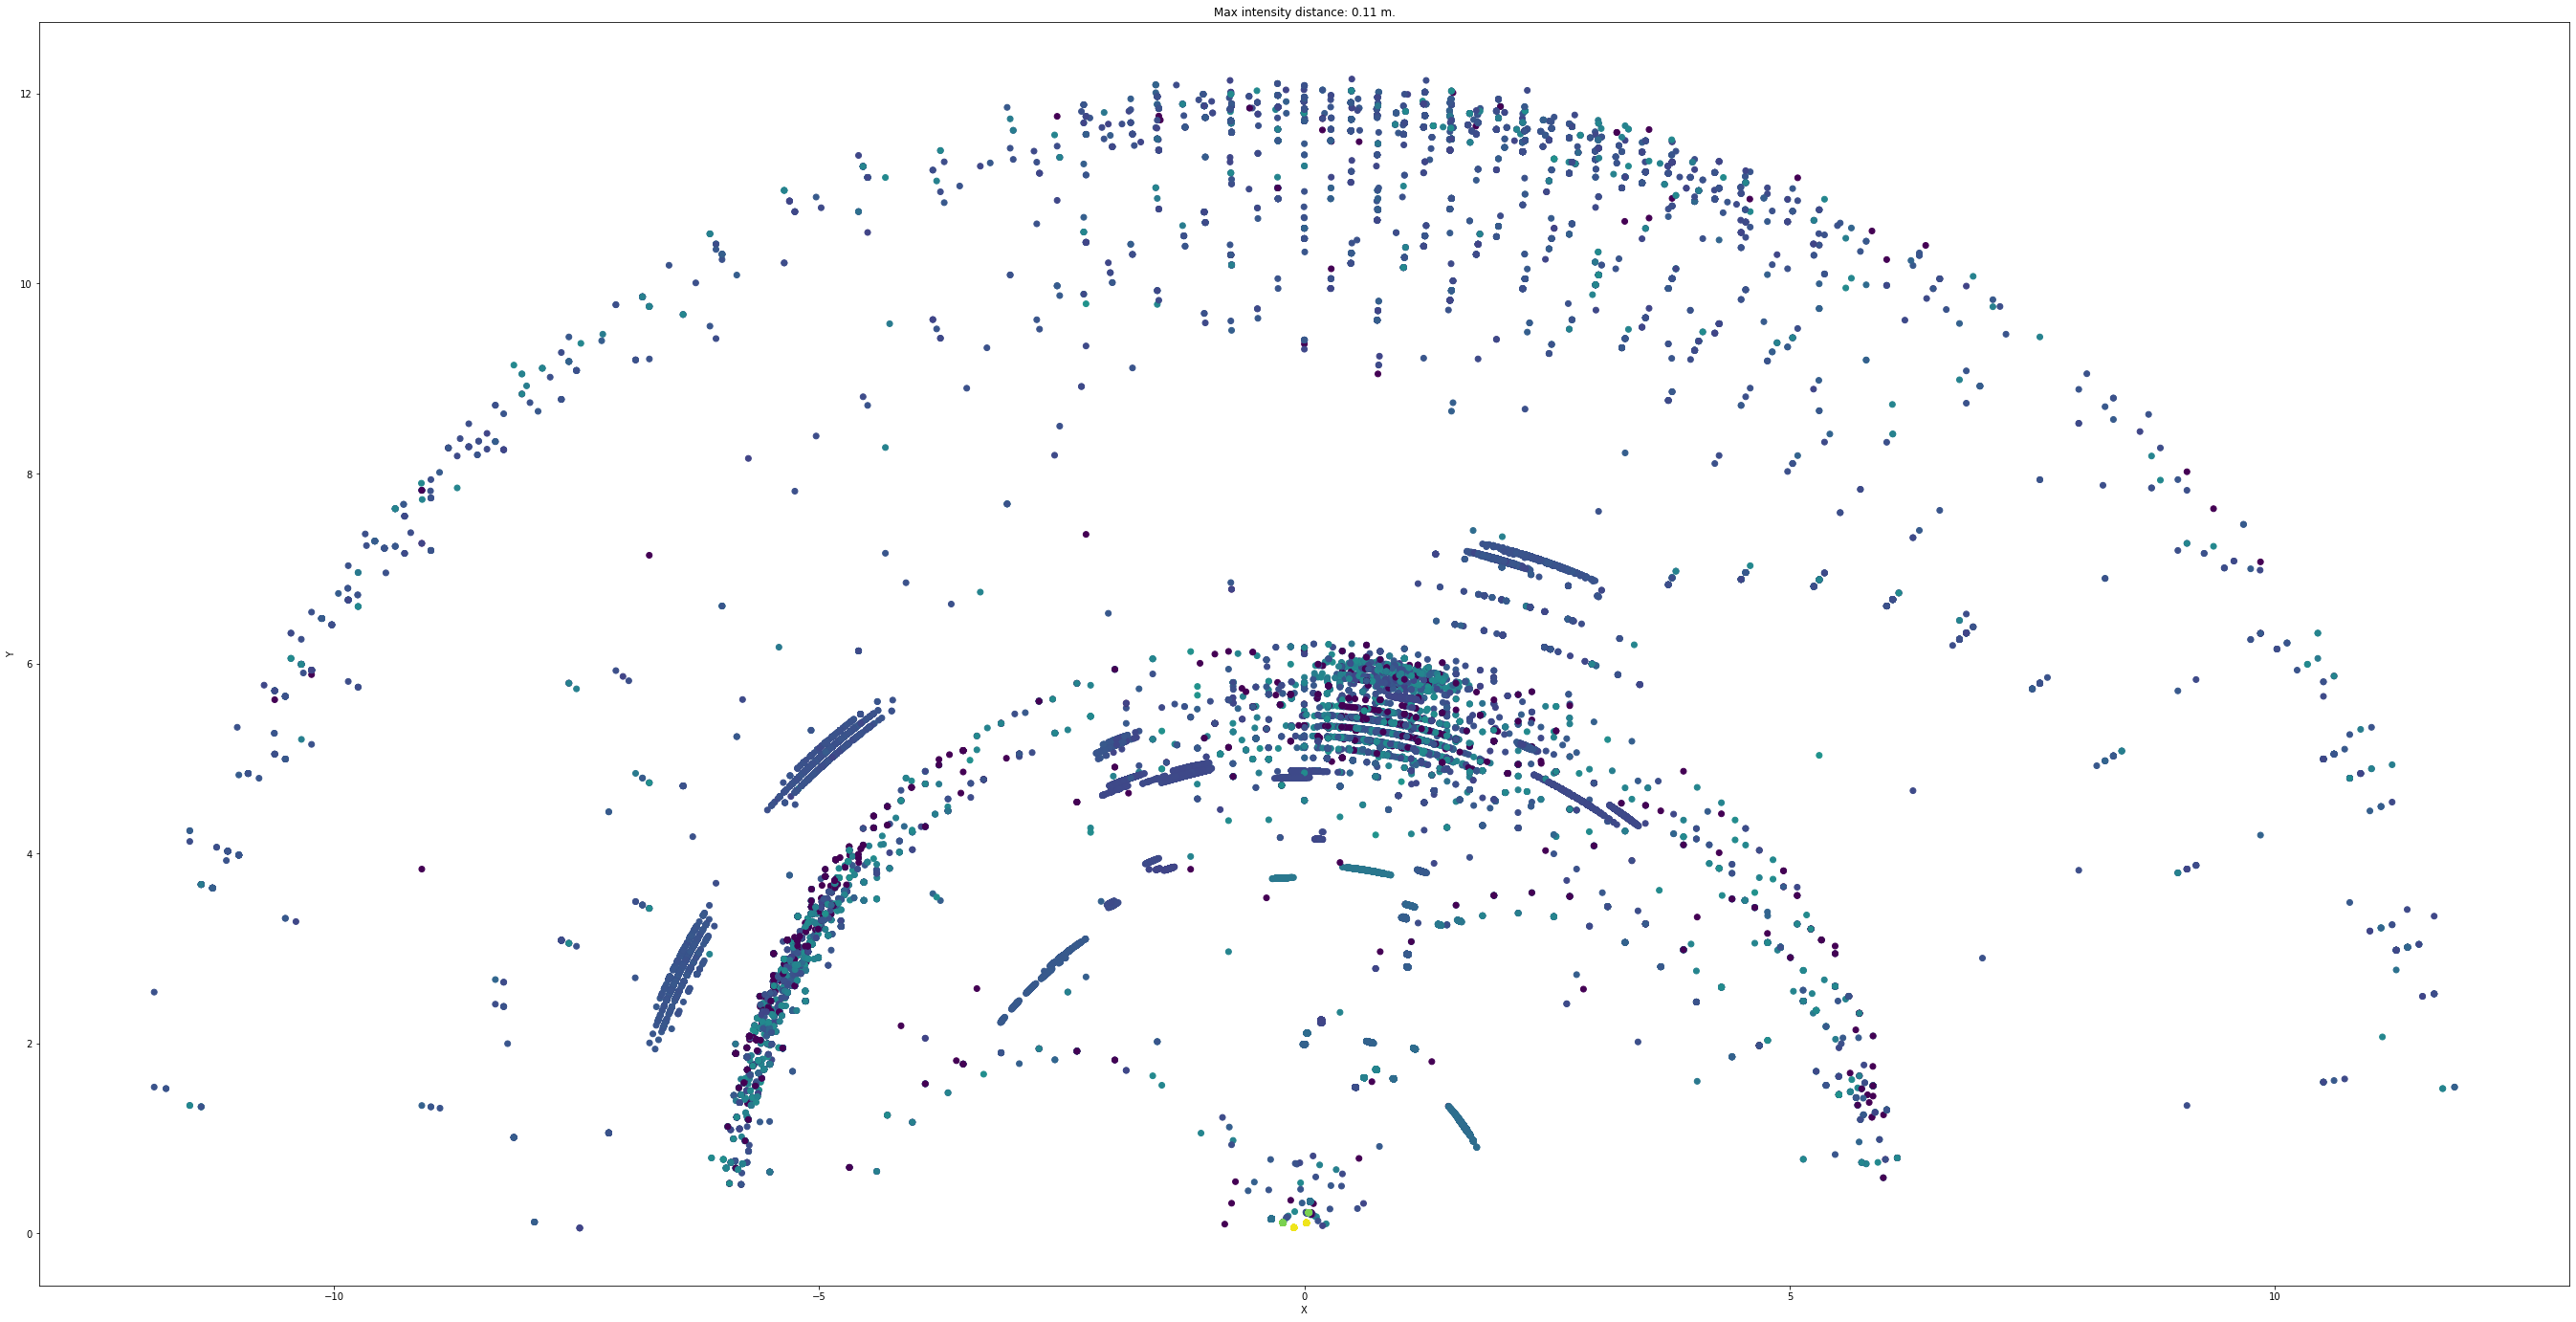

In [28]:
max_int_y = utils.plot_1843(
    x1843, y1843, z1843, ang1843, int1843, rng1843, dop1843, 
    y_limit=999, x_limit=999, y_threshold=0,
    int_threshold=0, int_threshold_percent=False
)

## 2.3 Plot Older Data

### Test 1: 0 angle, 1.13m surface, ~2m ground

In [8]:
filename = '0_deg_1m.bag'
path = os.path.join('../data/old_deployments/05_11_2023', filename)

imu, r1843, r1443 = utils.read_old_messages(path)
x1843, y1843, z1843, ang1843, int1843, rng1843, dop1843 = utils.process_1843(r1843, imu, apply_rotation=True)

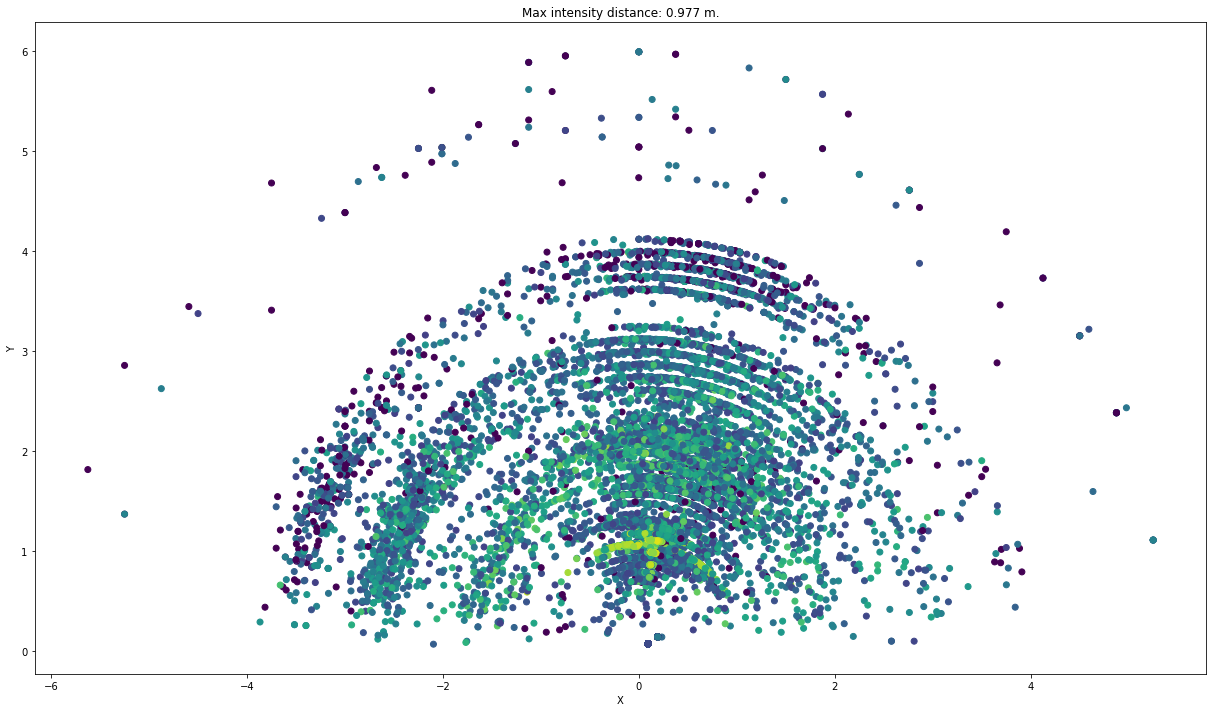

0.977

In [20]:
utils.plot_1843(x1843, y1843, z1843, ang1843, int1843, rng1843, dop1843)

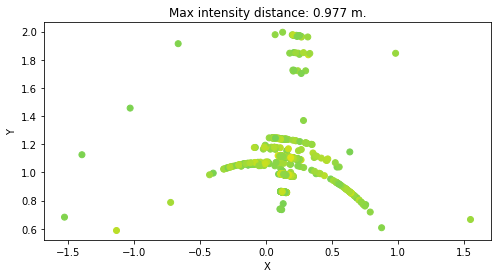

In [19]:
y_limit=6
x_limit=6
y_threshold=0.5
int_threshold=60

max_int_y = utils.plot_1843(
    x1843, y1843, z1843, ang1843, int1843, rng1843, dop1843, 
    y_limit=2, x_limit=2, y_threshold=0.5,
    int_threshold=25, int_threshold_percent=False,
)